In [1]:
import json
import os

import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

def read_ldjson(filename):
    res = []
    with open(filename) as xfp:
        for l in xfp:
            try:
                res.append(json.loads(l))
            except Exception as e:
                print(e, l)
    return res

In [2]:
dinter = pd.DataFrame(read_ldjson("bitrates/inter4k_bitrates.ldjson"))
dinter["vid"] = dinter["filename"].apply(lambda x: os.path.basename(x))
dinter["dataset"] = "Inter4K"
dinter

,bit_rate_kb/s,filename,vid,dataset
0,16197.478,reencoded/854.mp4,854.mp4,Inter4K
1,22109.457,reencoded/480.mp4,480.mp4,Inter4K
2,21884.886,reencoded/858.mp4,858.mp4,Inter4K
3,9587.096,reencoded/764.mp4,764.mp4,Inter4K
4,9152.744,reencoded/760.mp4,760.mp4,Inter4K
...,...,...,...,...
995,14176.583,reencoded/424.mp4,424.mp4,Inter4K
996,15021.830,reencoded/799.mp4,799.mp4,Inter4K
997,12007.355,reencoded/955.mp4,955.mp4,Inter4K
998,6177.851,reencoded/670.mp4,670.mp4,Inter4K


In [3]:
dugc = pd.DataFrame(read_ldjson("bitrates/ugc_bitrates.ldjson"))
dugc["vid"] = dugc["filename"].apply(lambda x: os.path.basename(x))
dugc["dataset"] = "YTUGC"
dugc

,bit_rate_kb/s,filename,vid,dataset
0,11221.425,ugc_reencoded/Sports_2160P-69b9_crf_10_ss_00_t...,Sports_2160P-69b9_crf_10_ss_00_t_20.0.mp4,YTUGC
1,7299.395,ugc_reencoded/VR_2160P-0ba9_crf_10_ss_00_t_20....,VR_2160P-0ba9_crf_10_ss_00_t_20.0.mp4,YTUGC
2,1549.499,ugc_reencoded/Sports_2160P-1733_crf_10_ss_00_t...,Sports_2160P-1733_crf_10_ss_00_t_20.0.mp4,YTUGC
3,4766.990,ugc_reencoded/Gaming_2160P-34a1_crf_10_ss_00_t...,Gaming_2160P-34a1_crf_10_ss_00_t_20.0.mp4,YTUGC
4,36479.382,ugc_reencoded/VR_2160P-05a6_crf_10_ss_00_t_20....,VR_2160P-05a6_crf_10_ss_00_t_20.0.mp4,YTUGC
...,...,...,...,...
120,20889.340,ugc_reencoded/HDR_2160P-6fab_crf_10_ss_00_t_20...,HDR_2160P-6fab_crf_10_ss_00_t_20.0.mp4,YTUGC
121,8217.428,ugc_reencoded/Sports_2160P-279f_crf_10_ss_00_t...,Sports_2160P-279f_crf_10_ss_00_t_20.0.mp4,YTUGC
122,35223.873,ugc_reencoded/Sports_2160P-3d85_crf_10_ss_00_t...,Sports_2160P-3d85_crf_10_ss_00_t_20.0.mp4,YTUGC
123,38527.987,ugc_reencoded/VR_2160P-613e_crf_10_ss_00_t_20....,VR_2160P-613e_crf_10_ss_00_t_20.0.mp4,YTUGC


In [4]:
dbr = pd.concat([dugc, dinter], ignore_index=True)
dbr

,bit_rate_kb/s,filename,vid,dataset
0,11221.425,ugc_reencoded/Sports_2160P-69b9_crf_10_ss_00_t...,Sports_2160P-69b9_crf_10_ss_00_t_20.0.mp4,YTUGC
1,7299.395,ugc_reencoded/VR_2160P-0ba9_crf_10_ss_00_t_20....,VR_2160P-0ba9_crf_10_ss_00_t_20.0.mp4,YTUGC
2,1549.499,ugc_reencoded/Sports_2160P-1733_crf_10_ss_00_t...,Sports_2160P-1733_crf_10_ss_00_t_20.0.mp4,YTUGC
3,4766.990,ugc_reencoded/Gaming_2160P-34a1_crf_10_ss_00_t...,Gaming_2160P-34a1_crf_10_ss_00_t_20.0.mp4,YTUGC
4,36479.382,ugc_reencoded/VR_2160P-05a6_crf_10_ss_00_t_20....,VR_2160P-05a6_crf_10_ss_00_t_20.0.mp4,YTUGC
...,...,...,...,...
1120,14176.583,reencoded/424.mp4,424.mp4,Inter4K
1121,15021.830,reencoded/799.mp4,799.mp4,Inter4K
1122,12007.355,reencoded/955.mp4,955.mp4,Inter4K
1123,6177.851,reencoded/670.mp4,670.mp4,Inter4K


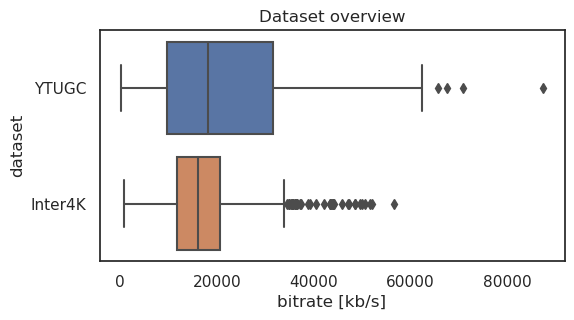

In [5]:
ax = sns.boxplot(x="bit_rate_kb/s", y="dataset", data=dbr)
ax.set_xlabel("bitrate [kb/s]")
ax.set_title("Dataset overview")
ax.get_figure().savefig("datasets.pdf", bbox_inches="tight")

the predictions have been obtained using a command similar to 

```bash
find INTER4KDataset -name "*.mp4" | xargs -i -P 30 ./MODEL.sh {} > inter4k.ldjson
```

     bit_rate_kb/s                                           filename   
0        11221.425  ugc_reencoded/Sports_2160P-69b9_crf_10_ss_00_t...  \
1         7299.395  ugc_reencoded/VR_2160P-0ba9_crf_10_ss_00_t_20....   
2         1549.499  ugc_reencoded/Sports_2160P-1733_crf_10_ss_00_t...   
3         4766.990  ugc_reencoded/Gaming_2160P-34a1_crf_10_ss_00_t...   
4        36479.382  ugc_reencoded/VR_2160P-05a6_crf_10_ss_00_t_20....   
..             ...                                                ...   
120      20889.340  ugc_reencoded/HDR_2160P-6fab_crf_10_ss_00_t_20...   
121       8217.428  ugc_reencoded/Sports_2160P-279f_crf_10_ss_00_t...   
122      35223.873  ugc_reencoded/Sports_2160P-3d85_crf_10_ss_00_t...   
123      38527.987  ugc_reencoded/VR_2160P-613e_crf_10_ss_00_t_20....   
124      33951.694  ugc_reencoded/Sports_2160P-0455_crf_10_ss_00_t...   

                                           vid dataset   
0    Sports_2160P-69b9_crf_10_ss_00_t_20.0.mp4   YTUGC  \
1      

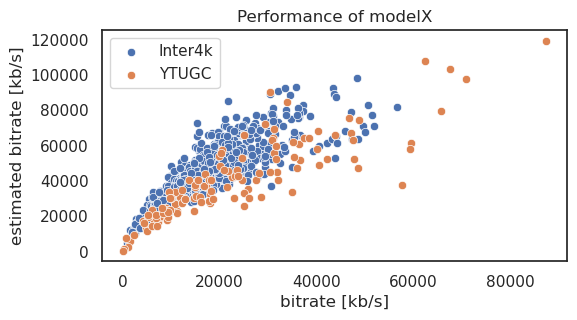

In [15]:
# check predictions

def get_corr(dd, dataset, model):
    res = {
        "dataset": dataset,
        "pearson": dd[["bit_rate_kb/s", "estimated_bitrate_[kb/s]"]].corr()["estimated_bitrate_[kb/s]"].iloc[0],
        "kendall": dd[["bit_rate_kb/s", "estimated_bitrate_[kb/s]"]].corr(method="kendall")["estimated_bitrate_[kb/s]"].iloc[0],
        "spearman": dd[["bit_rate_kb/s", "estimated_bitrate_[kb/s]"]].corr(method="spearman")["estimated_bitrate_[kb/s]"].iloc[0],
        "model": model,
    }
    return res

def evaluate(model):
    dmX_inter = pd.DataFrame(read_ldjson(f"bitrates/{model}_inter4k.ldjson"))
    dmX_inter["vid"] = dmX_inter["video"].apply(lambda x: os.path.basename(x))
    dmX_inter

    dm = pd.merge(dbr, dmX_inter, left_on="vid", right_on="vid")
    #dm["estimated_bitrate_[kb/s]"] = dm["estimated_bitrate_[kb/s]"].apply(lambda x : 6000 if x < 0 else x) 
    dmX_ugc = pd.DataFrame(read_ldjson(f"bitrates/{model}_ugc.ldjson"))
    dmX_ugc["vid"] = dmX_ugc["video"].apply(lambda x: os.path.basename(x))

    dm_ugc = pd.merge(dbr, dmX_ugc, left_on="vid", right_on="vid")
    #dm_ugc["estimated_bitrate_[kb/s]"] = dm_ugc["estimated_bitrate_[kb/s]"].apply(lambda x : 6000 if x < 0 else x)
    print(dm_ugc)
    
    sns.scatterplot(x="bit_rate_kb/s", y="estimated_bitrate_[kb/s]", data=dm, label="Inter4k")
    ax = sns.scatterplot(x="bit_rate_kb/s", y="estimated_bitrate_[kb/s]", data=dm_ugc, label="YTUGC")
    ax.set_title(f"Performance of {model}")
    ax.set_xlabel("bitrate [kb/s]")
    ax.set_ylabel("estimated bitrate [kb/s]")
    ax.get_figure().savefig(f"{model}_performance.pdf", bbox_inches="tight")
    results = [
        get_corr(dm, "Inter4K", model),
        get_corr(dm_ugc, "YTUGC", model),
    ]
    return results

results = evaluate("modelX")

     bit_rate_kb/s                                           filename   
0        11221.425  ugc_reencoded/Sports_2160P-69b9_crf_10_ss_00_t...  \
1         7299.395  ugc_reencoded/VR_2160P-0ba9_crf_10_ss_00_t_20....   
2         1549.499  ugc_reencoded/Sports_2160P-1733_crf_10_ss_00_t...   
3         4766.990  ugc_reencoded/Gaming_2160P-34a1_crf_10_ss_00_t...   
4        36479.382  ugc_reencoded/VR_2160P-05a6_crf_10_ss_00_t_20....   
..             ...                                                ...   
120      20889.340  ugc_reencoded/HDR_2160P-6fab_crf_10_ss_00_t_20...   
121       8217.428  ugc_reencoded/Sports_2160P-279f_crf_10_ss_00_t...   
122      35223.873  ugc_reencoded/Sports_2160P-3d85_crf_10_ss_00_t...   
123      38527.987  ugc_reencoded/VR_2160P-613e_crf_10_ss_00_t_20....   
124      33951.694  ugc_reencoded/Sports_2160P-0455_crf_10_ss_00_t...   

                                           vid dataset   
0    Sports_2160P-69b9_crf_10_ss_00_t_20.0.mp4   YTUGC  \
1      

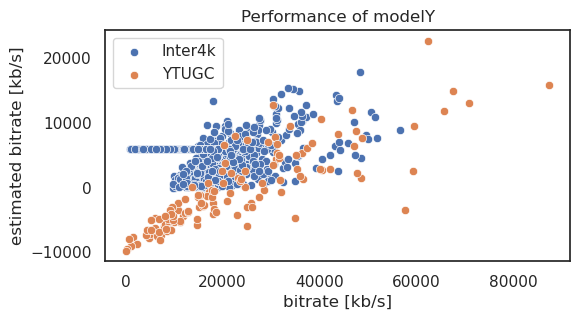

In [16]:
results.extend(evaluate("modelY"))

In [15]:
dresults = pd.DataFrame(results)
print(dresults.sort_values(by=["dataset", "pearson"]).round(3).to_latex(index=False))
dresults.round(3)

\begin{tabular}{lrrrl}
\toprule
dataset & pearson & kendall & spearman & model \\
\midrule
Inter4K & 0.783000 & 0.623000 & 0.812000 & modelY \\
Inter4K & 0.848000 & 0.715000 & 0.886000 & modelX \\
YTUGC & 0.838000 & 0.707000 & 0.876000 & modelY \\
YTUGC & 0.869000 & 0.732000 & 0.901000 & modelX \\
\bottomrule
\end{tabular}



,dataset,pearson,kendall,spearman,model
0,Inter4K,0.848,0.715,0.886,modelX
1,YTUGC,0.869,0.732,0.901,modelX
2,Inter4K,0.783,0.623,0.812,modelY
3,YTUGC,0.838,0.707,0.876,modelY
